In [40]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [41]:
all_df = pd.read_csv("data.csv")

In [42]:
all_df['class']= all_df['class'].map({'RB':0, 'NRB': 1}).astype(int)

In [43]:
X=all_df.drop(['class'], axis=1).values.astype('float64')

In [44]:
Y = all_df['class'].values.astype('int64')

In [45]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

844

In [46]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [47]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [48]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv1D,MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [49]:
model = Sequential()

In [50]:
model.add(Conv1D(filters=123*9,
                 kernel_size=3,
                 padding='valid',
                 input_shape=(41,1), 
                 activation='relu'))

In [51]:
model.add(MaxPooling1D(pool_size=1))

In [52]:
model.add(Conv1D(filters=123*8,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [53]:
model.add(MaxPooling1D(pool_size=1))

In [54]:
model.add(Conv1D(filters=123*7,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [55]:
model.add(MaxPooling1D(pool_size=1))

In [56]:
model.add(Conv1D(filters=123*6,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [57]:
model.add(MaxPooling1D(pool_size=1))

In [58]:
model.add(Conv1D(filters=123*5,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [59]:
model.add(MaxPooling1D(pool_size=1))

In [60]:
model.add(Conv1D(filters=123*4,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [61]:
model.add(MaxPooling1D(pool_size=1))

In [62]:
model.add(Conv1D(filters=123*3,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [63]:
model.add(MaxPooling1D(pool_size=1))

In [64]:
model.add(Conv1D(filters=123*2,
                 kernel_size=3,
                 padding='valid',
                 activation='relu'))

In [65]:
model.add(MaxPooling1D(pool_size=1))

In [66]:
model.add(Conv1D(filters=123,
                 kernel_size=3,
                 padding='valid', 
                 activation='relu'))

In [67]:
model.add(MaxPooling1D(pool_size=1))

In [68]:
model.add(Flatten())

In [69]:
model.add(Dense(41, activation='tanh'))

In [70]:
model.add(Dense(1,activation='sigmoid'))

In [71]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 39, 1107)          4428      
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 39, 1107)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 37, 984)           3268848   
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 37, 984)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 35, 861)           2542533   
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 35, 861)           0         
_________________________________________________________________
conv1d_13 (Conv1D)           (None, 33, 738)           1906992   
__________

In [72]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [73]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=30,verbose=1,callbacks=[early_stopping])

Train on 675 samples, validate on 169 samples
Epoch 1/30
675/675 [==============================] - 138s 204ms/step - loss: 0.7990 - acc: 0.6889 - val_loss: 0.4900 - val_acc: 0.7811
Epoch 2/30
675/675 [==============================] - 86s 127ms/step - loss: 0.4694 - acc: 0.7852 - val_loss: 0.4632 - val_acc: 0.8047
Epoch 3/30
675/675 [==============================] - 86s 127ms/step - loss: 0.4186 - acc: 0.8207 - val_loss: 0.5112 - val_acc: 0.7456
Epoch 4/30
675/675 [==============================] - 90s 134ms/step - loss: 0.4200 - acc: 0.8119 - val_loss: 0.5061 - val_acc: 0.7278


In [74]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

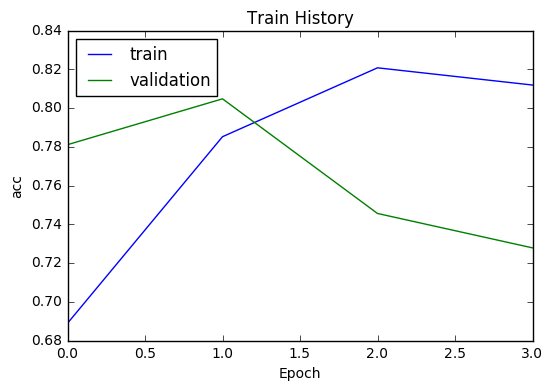

In [75]:
show_train_history(train_history,'acc','val_acc')

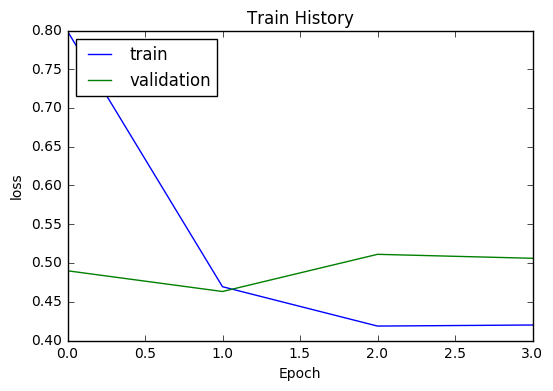

In [76]:
show_train_history(train_history,'loss','val_loss')

In [77]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

211/211 [==============================] - 5s 24ms/step


In [78]:
scores[1]

0.7440758313612915